<a href="https://colab.research.google.com/github/roronoazoro182/NLP/blob/main/J053_nlp_lab1(spam_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
from google.colab import files
files.upload()

Saving spam.csv to spam.csv


{'spam.csv': b'v1,v2,,,\r\nham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,\r\nham,Ok lar... Joking wif u oni...,,,\r\nspam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s,,,\r\nham,U dun say so early hor... U c already then say...,,,\r\nham,"Nah I don\'t think he goes to usf, he lives around here though",,,\r\nspam,"FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, \xe5\xa31.50 to rcv",,,\r\nham,Even my brother is not like to speak with me. They treat me like aids patent.,,,\r\nham,As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,\r\nspam,WINNER!! As a valued network customer you have been selected to rece

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.iloc[:,0:2]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.shape

(5572, 2)

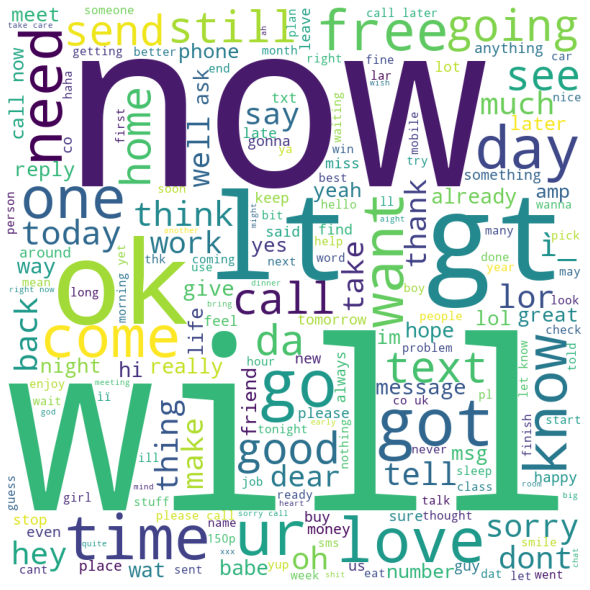

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.iloc[:,1]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Text preprocessing**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tag import pos_tag


In [ ]:
x = df['v2']
y = df['v1']

In [ ]:
print(x.head(),y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object 0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object


In [ ]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [ ]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)

In [ ]:
x[5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [ ]:
final_corpus = []
for i in range(len(x)):
  word = word_tokenize(x[i].lower())
  stop = [y for y in word if y not in stuff_to_be_removed]
  lem = lemmatize_sentence(stop)
  k = " ".join(lem)
  final_corpus.append(k)
final_corpus  

['go jurong point crazy.. available bugis n great world la e buffet ... cine get amore wat ...',
 'ok lar ... joke wif u oni ...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question std txt rate c 's apply 08452810075over18 's",
 'u dun say early hor ... u c already say ...',
 "nah n't think go usf life around though",
 "freemsg hey darling 's 3 week 's word back 'd like fun still tb ok xxx std chgs send å£1.50 rcv",
 'even brother like speak treat like aid patent',
 "per request 'melle melle oru minnaminunginte nurungu vettam set callertune caller press *9 copy friend callertune",
 'winner value network customer select receivea å£900 prize reward claim call 09061701461. claim code kl341 valid 12 hour',
 'mobile 11 month u r entitle update late colour mobile camera free call mobile update co free 08002986030',
 "'m gon na home soon n't want talk stuff anymore tonight k 've cry enough today",
 'six chance win cash 100 20,000 pound txt csh1

In [ ]:
new_df = pd.DataFrame(final_corpus)

In [ ]:
new_df['class'] = y.to_list()
new_df.columns = ['text','class']

In [ ]:
new_df.head()

,text,class
0,go jurong point crazy.. available bugis n grea...,ham
1,ok lar ... joke wif u oni ...,ham
2,free entry 2 wkly comp win fa cup final tkts 2...,spam
3,u dun say early hor ... u c already say ...,ham
4,nah n't think go usf life around though,ham


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_df['text'],y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(new_df['text'])
x_train = vector.toarray()
print(x_train)
y_train= new_df['class']

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB
ab = MultinomialNB()
ab.fit(x_train,y_train)
ypred = ab.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,ypred))
print(confusion_matrix(y_train,ypred))
print(classification_report(y_train,ypred))

0.9816941852117731
[[4825    0]
 [ 102  645]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.86      0.93       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572

